In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('male_players (legacy).csv', na_values='-')

In [5]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Columns: 110 entries, player_id to player_face_url
dtypes: float64(34), int64(29), object(47)
memory usage: 1.6+ MB


In [ ]:
# Check for missing values and drop columns with too many missing values
missing_values = df.isnull().sum()
print(missing_values)


player_id           0
player_url          0
fifa_version        0
fifa_update         0
fifa_update_date    0
                   ..
cb                  1
rcb                 1
rb                  1
gk                  1
player_face_url     1
Length: 110, dtype: int64


In [6]:
df.drop(['player_id', 'player_url', 'short_name', 'long_name', 'player_face_url',
    'fifa_version', 'fifa_update', 'fifa_update_date',
    'league_id', 'league_name', 'league_level',
    'club_team_id', 'club_name', 'club_position', 'club_jersey_number',
    'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year',
    'nationality_id', 'nationality_name', 'nation_team_id',
    'nation_position', 'nation_jersey_number', 'player_tags', 'player_traits'],axis=1, inplace=True)

In [7]:
L=[]
L_less=[]
for i in df.columns:
    if((df[i].isnull().sum())<(0.3*(df.shape[0]))):
        L.append(i)
    else:
        L_less.append(i)

In [11]:
df=df[L]

In [ ]:
df.head()

,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,preferred_foot,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,CF,93.0,95.0,100500000.0,550000.0,27.0,1987-06-24,169.0,67.0,Left,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3
1,"LW, LM",92.0,92.0,79000000.0,375000.0,29.0,1985-02-05,185.0,80.0,Right,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3
2,"RM, LM, RW",90.0,90.0,54500000.0,275000.0,30.0,1984-01-23,180.0,80.0,Left,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3
3,ST,90.0,90.0,52500000.0,275000.0,32.0,1981-10-03,195.0,95.0,Right,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3
4,GK,90.0,90.0,63500000.0,300000.0,28.0,1986-03-27,193.0,92.0,Right,...,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3


In [13]:
# Separate columns by data type
numerical_columns = df.select_dtypes(include=np.number)
categorical_columns = df.select_dtypes(include=['object'])

In [14]:
# Imputation of missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [15]:
imp= IterativeImputer(max_iter=10, random_state=0)
numerical_columns=pd.DataFrame(np.round(imp.fit_transform(numerical_columns)),columns=numerical_columns.columns) #all colums without missing values


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [16]:

categorical_columns = pd.get_dummies(categorical_columns).astype(int)

In [ ]:
categorical_columns

,player_positions_CAM,"player_positions_CAM, CDM","player_positions_CAM, CDM, CF","player_positions_CAM, CDM, CM","player_positions_CAM, CDM, CM, RM","player_positions_CAM, CDM, CM, RW","player_positions_CAM, CDM, LM","player_positions_CAM, CDM, RM","player_positions_CAM, CDM, RM, CM","player_positions_CAM, CF",...,gk_82+2,gk_83,gk_83+1,gk_83+2,gk_84+1,gk_85+1,gk_87+3,gk_9,gk_9+1,gk_9+2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Summary statistics
df.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,...,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,16105.000000,16105.000000,1.579500e+04,15866.000000,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000,...,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000
mean,63.917976,68.411735,1.085754e+06,13295.096433,24.806147,181.095809,75.495560,2.932195,2.267122,1.122881,...,50.823781,49.704688,45.059298,47.701211,45.923688,15.864638,15.506985,15.349581,15.501708,15.993046
std,7.065140,6.519368,2.846338e+06,23636.074122,4.609360,6.626352,6.894898,0.649619,0.717604,0.396819,...,15.092733,14.548554,17.929985,18.759171,18.162328,17.590775,16.428093,16.020254,16.595645,17.997953
min,47.000000,47.000000,1.000000e+03,2000.000000,16.000000,155.000000,50.000000,1.000000,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,59.000000,64.000000,1.300000e+05,2000.000000,21.000000,176.000000,71.000000,3.000000,2.000000,1.000000,...,41.000000,39.000000,25.000000,25.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,64.000000,68.000000,3.750000e+05,5000.000000,24.000000,181.000000,75.000000,3.000000,2.000000,1.000000,...,52.000000,50.000000,46.000000,52.000000,49.000000,11.000000,11.000000,11.000000,10.000000,10.000000
75%,68.000000,73.000000,8.500000e+05,10000.000000,28.000000,186.000000,80.000000,3.000000,3.000000,1.000000,...,62.000000,61.000000,61.000000,64.000000,62.000000,13.000000,14.000000,13.000000,13.000000,13.000000
max,93.000000,95.000000,1.005000e+08,550000.000000,44.000000,204.000000,110.000000,5.000000,5.000000,5.000000,...,96.000000,95.000000,90.000000,91.000000,95.000000,88.000000,87.000000,92.000000,90.000000,90.000000


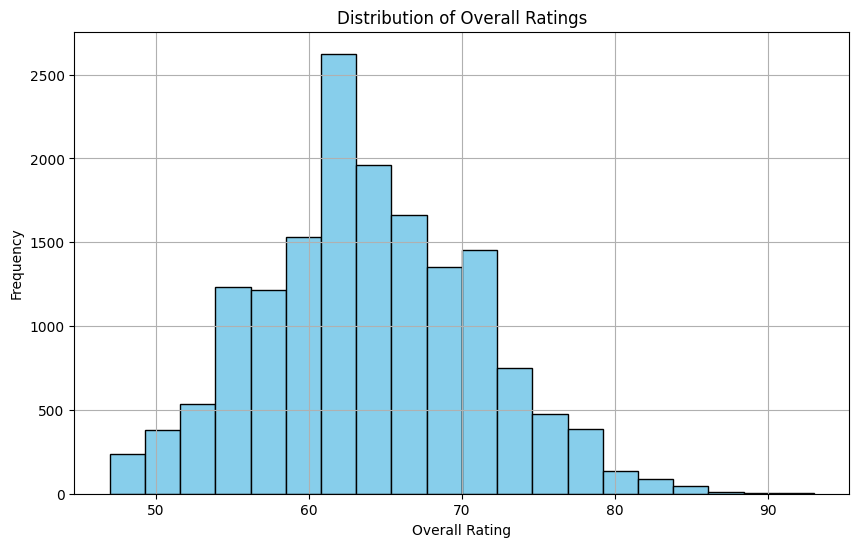

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['overall'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [17]:
# Compute the correlation matrix for the numeric columns
corr_matrix = numerical_columns.corr()
print(corr_matrix)

                              overall  potential  value_eur  wage_eur  \
overall                      1.000000   0.746164   0.827096  0.863255   
potential                    0.746164   1.000000   0.643879  0.644624   
value_eur                    0.827096   0.643879   1.000000  0.905859   
wage_eur                     0.863255   0.644624   0.905859  1.000000   
age                          0.021187  -0.533800  -0.085246 -0.044093   
height_cm                    0.024271  -0.035253  -0.020069 -0.017524   
weight_kg                    0.033759  -0.075949  -0.009195 -0.007037   
weak_foot                    0.106340   0.152746   0.099314  0.108655   
skill_moves                  0.142238   0.231311   0.214687  0.188108   
international_reputation     0.692267   0.354869   0.601184  0.658300   
pace                         0.096968   0.287249   0.182055  0.186298   
shooting                     0.171887   0.183797   0.224475  0.219881   
passing                      0.160332   0.192992   

In [18]:
# Creating a new feature 'passing_dribbling_ratio'
numerical_columns['passing_dribbling_ratio'] = numerical_columns['passing'] /numerical_columns['dribbling']

# Creating an interaction term 'shooting_aggression_interaction'
numerical_columns['shooting_aggression_interaction'] =numerical_columns['shooting'] * numerical_columns['mentality_aggression']

In [ ]:
corr_matrix["overall"].sort_values(ascending=False)

overall                        1.000000
potential                      0.800103
movement_reactions             0.790595
wage_eur                       0.721798
value_eur                      0.581870
international_reputation       0.526685
passing                        0.494299
attacking_short_passing        0.477177
skill_ball_control             0.468631
skill_long_passing             0.461646
power_shot_power               0.460324
power_long_shots               0.442769
skill_curve                    0.439564
physic                         0.436393
mentality_vision               0.433596
dribbling                      0.432658
age                            0.430847
shooting                       0.424954
skill_fk_accuracy              0.423371
attacking_crossing             0.420232
attacking_volleys              0.407088
skill_dribbling                0.387048
mentality_aggression           0.376878
mentality_positioning          0.370419
attacking_heading_accuracy     0.365567


In [19]:
#feature importance to select most relevant features from categorical_columns

# Set a threshold for the absolute value of the correlation coefficient
threshold = 0.1

# Identify columns that have a low correlation with the target variable
unnecessary_columns = corr_matrix["overall"].loc[lambda x: abs(x) < threshold].index.tolist()

# Drop the unnecessary columns from the DataFrame
numerical_columns.drop(unnecessary_columns, axis=1, inplace=True)


In [20]:



# Combine numerical and categorical columns
X = pd.concat([numerical_columns, categorical_columns], axis=1)

# Separate features and target
y=numerical_columns['overall']
X = X.drop('overall', axis=1)


X

,potential,value_eur,wage_eur,weak_foot,skill_moves,international_reputation,shooting,passing,dribbling,attacking_crossing,...,gk_82+2,gk_83,gk_83+1,gk_83+2,gk_84+1,gk_85+1,gk_87+3,gk_9,gk_9+1,gk_9+2
0,95.0,100500000.0,550000.0,3.0,4.0,5.0,89.0,86.0,96.0,84.0,...,0,0,0,0,0,0,0,0,0,0
1,92.0,79000000.0,375000.0,4.0,5.0,5.0,93.0,81.0,91.0,83.0,...,0,0,0,0,0,0,0,0,0,0
2,90.0,54500000.0,275000.0,2.0,4.0,5.0,86.0,83.0,92.0,80.0,...,0,0,0,0,0,0,0,0,0,0
3,90.0,52500000.0,275000.0,4.0,4.0,5.0,91.0,81.0,86.0,76.0,...,0,0,0,0,0,0,0,0,0,0
4,90.0,63500000.0,300000.0,4.0,1.0,5.0,29.0,32.0,33.0,25.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,72.0,800000.0,15000.0,2.0,1.0,2.0,24.0,23.0,32.0,25.0,...,0,0,0,0,0,0,0,0,0,0
1908,72.0,450000.0,15000.0,2.0,1.0,2.0,28.0,24.0,31.0,25.0,...,0,0,0,0,0,0,0,0,0,0
1909,72.0,400000.0,15000.0,3.0,2.0,2.0,37.0,46.0,40.0,32.0,...,0,0,0,0,0,0,0,0,0,0
1910,72.0,750000.0,15000.0,3.0,2.0,1.0,41.0,57.0,45.0,51.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
categorical_columns

,player_positions_CAM,"player_positions_CAM, CDM","player_positions_CAM, CDM, CM","player_positions_CAM, CDM, CM, RM","player_positions_CAM, CDM, CM, RW","player_positions_CAM, CDM, LM","player_positions_CAM, CDM, RM","player_positions_CAM, CDM, RM, CM","player_positions_CAM, CF","player_positions_CAM, CF, CM",...,gk_82+2,gk_83,gk_83+1,gk_83+2,gk_84+1,gk_85+1,gk_87+3,gk_9,gk_9+1,gk_9+2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y,actual_values=pd.factorize(y)
actual_values

Index([93.0, 92.0, 90.0, 89.0, 88.0, 87.0, 86.0, 85.0, 84.0, 83.0, 82.0, 81.0,
       80.0, 79.0, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0],
      dtype='float64')

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,VotingRegressor
import xgboost as xgb

In [24]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
import pickle as pkl



# Define the models
models = [
    RandomForestRegressor(random_state=42),
    xgb.XGBRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42)
]








In [26]:
# Train, evaluate, and save each model
model_scores = {}
for model in models:
    # Evaluate using cross-validation
    scores = cross_val_score(model, Xtrain, Ytrain, cv=5)
    mean_score = scores.mean()

    # Store the mean cross-validation score
    model_scores[model.__class__.__name__] = mean_score

    # Train the model on the full training set
    model.fit(Xtrain, Ytrain)

    # Save the trained model
    pkl.dump(model, open(f'C:\\Users\\vera.anthonio\\{model.__class__.__name__}.pkl', 'wb'))


    # Print the cross-validation scores
    print(f"{model.__class__.__name__} Cross-Validation Scores: {scores}")
    print(f"Mean {model.__class__.__name__} Cross-Validation Score: {mean_score}")

RandomForestRegressor Cross-Validation Scores: [0.94125215 0.94973167 0.96899192 0.92342756 0.95441691]
Mean RandomForestRegressor Cross-Validation Score: 0.9475640416361175
XGBRegressor Cross-Validation Scores: [0.94097983 0.94883123 0.9725827  0.9273305  0.94909439]
Mean XGBRegressor Cross-Validation Score: 0.947763731733807
GradientBoostingRegressor Cross-Validation Scores: [0.93327108 0.94105473 0.96567179 0.92958686 0.94695052]
Mean GradientBoostingRegressor Cross-Validation Score: 0.943306996712068


In [27]:
# Create and evaluate the ensemble model
ensemble_model = VotingRegressor([
    ('rf', models[0]),
    ('xgb', models[1]),
    ('gb', models[2])
])

# Evaluate the ensemble model using cross-validation
ensemble_scores = cross_val_score(ensemble_model, Xtrain, Ytrain, cv=5)
ensemble_mean_score = ensemble_scores.mean()

# Store the mean cross-validation score of the ensemble model
model_scores['Ensemble'] = ensemble_mean_score

# Train the ensemble model on the full training set
ensemble_model.fit(Xtrain, Ytrain)

# Save the ensemble model
pkl.dump(ensemble_model, open('C:\\Users\\vera.anthonio\\Ensemble.pkl', 'wb'))

# Print the ensemble model's cross-validation scores
print(f"Ensemble Model Cross-Validation Scores: {ensemble_scores}")
print(f"Mean Ensemble Model Cross-Validation Score: {ensemble_mean_score}")

# Compare the models and display the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]

print(f"Best Model: {best_model_name} with Mean Cross-Validation Score: {best_model_score}")

Ensemble Model Cross-Validation Scores: [0.94377183 0.952838   0.97237078 0.93181252 0.95495156]
Mean Ensemble Model Cross-Validation Score: 0.9511489394225696
Best Model: Ensemble with Mean Cross-Validation Score: 0.9511489394225696


In [28]:
# Define the models with parameter grids for tuning
param_grids = {
    'rf': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'xgb': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.3]
    },
    'gb': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.3]
    }
}


In [29]:
# Fine-tune the models using GridSearchCV
def fine_tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(Xtrain, Ytrain)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best MAE score for {model.__class__.__name__}: {-grid_search.best_score_}")
    return grid_search.best_estimator_

In [30]:
# Define the models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [ ]:
# Fine-tune each model
best_rf_model = fine_tune_model(rf_model, param_grids['rf'], Xtrain, Ytrain)

In [ ]:
best_xgb_model = fine_tune_model(xgb_model, param_grids['xgb'], Xtrain, Ytrain)

In [ ]:
best_gb_model = fine_tune_model(gb_model, param_grids['gb'], Xtrain, Ytrain)

Best parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
Best MAE score for GradientBoostingRegressor: 0.6062886782042739


In [ ]:
# Create the ensemble model with the fine-tuned base models
ensemble_model = VotingRegressor([
    ('rf', best_rf_model),
    ('xgb', best_xgb_model),
    ('gb', best_gb_model)
])

# Evaluate the ensemble model using cross-validation
ensemble_scores = cross_val_score(ensemble_model, Xtrain, Ytrain, cv=5)
ensemble_mean_score = ensemble_scores.mean()

# Store the mean cross-validation score of the ensemble model
model_scores = {'Ensemble': ensemble_mean_score}

In [ ]:
# Train the ensemble model on the full training set
ensemble_model.fit(Xtrain, Ytrain)

# Save the ensemble model
pkl.dump(ensemble_model, open('C:\\Users\\vera.anthonio\\Ensemble.pkl', 'wb'))

# Print the ensemble model's cross-validation scores
print(f"Ensemble Model Cross-Validation Scores: {ensemble_scores}")
print(f"Mean Ensemble Model Cross-Validation Score: {ensemble_mean_score}")


Ensemble Model Cross-Validation Scores: [0.96889311 0.97098146 0.97241948 0.97368219 0.97393901]
Mean Ensemble Model Cross-Validation Score: 0.971983050658816


In [ ]:
# Evaluate the ensemble model on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = ensemble_model.predict(Xtest)
test_mae = mean_absolute_error(Ytest, y_pred)
test_mse = mean_squared_error(Ytest, y_pred)
test_r2 = r2_score(Ytest, y_pred)


In [ ]:
print(f"Ensemble Model Test MAE: {test_mae}")
print(f"Ensemble Model Test MSE: {test_mse}")
print(f"Ensemble Model Test R²: {test_r2}")

Ensemble Model Test MAE: 0.617742999281204
Ensemble Model Test MSE: 0.9351207854427395
Ensemble Model Test R²: 0.9678168154696


In [ ]:
# Compare the models and display the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]

print(f"Best Model: {best_model_name} with Mean Cross-Validation Score: {best_model_score}")

Best Model: Ensemble with Mean Cross-Validation Score: 0.971983050658816


In [ ]:

import pandas as pd
import numpy as np
def preprocess_data(data_path):
  """
  This function automates the preprocessing steps performed on the male_players dataset.

  Args:
    data_path (str): The path to the CSV file containing the data.

  Returns:
    pd.DataFrame: The preprocessed data as a pandas DataFrame.
  """

  # Load the data from the CSV file
  df = pd.read_csv(data_path, na_values='-')

  # Drop unnecessary columns
  columns_to_drop = ['player_id', 'player_url', 'short_name', 'long_name', 'player_face_url',
                   'fifa_version', 'fifa_update', 'fifa_update_date',
                   'league_id', 'league_name', 'league_level',
                   'club_team_id', 'club_name', 'club_position', 'club_jersey_number',
                   'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year',
                   'nationality_id', 'nationality_name', 'nation_team_id',
                   'nation_position', 'nation_jersey_number', 'player_tags', 'player_traits']
  # Filter columns that exist in the DataFrame
  columns_to_drop = [col for col in columns_to_drop if col in df.columns]

  df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

  # Drop columns with more than 30% missing values
  missing_values = df.isnull().sum()
  columns_to_drop = missing_values[missing_values > df.shape[0] * 0.3].index
  df.drop(columns_to_drop, axis=1, inplace=True)

  # Separate columns by data type
  numerical_columns = df.select_dtypes(include=np.number)
  categorical_columns = df.select_dtypes(include=['object'])

  # Impute missing values
  imp = IterativeImputer(max_iter=10, random_state=0)
  numerical_columns = pd.DataFrame(np.round(imp.fit_transform(numerical_columns)), columns=numerical_columns.columns)

  # Convert categorical columns to one-hot encoding
  categorical_columns = pd.get_dummies(categorical_columns).astype(int)

  # Create new features
  numerical_columns['passing_dribbling_ratio'] = numerical_columns['passing'] / numerical_columns['dribbling']
  numerical_columns['shooting_aggression_interaction'] = numerical_columns['shooting'] * numerical_columns['mentality_aggression']

  # Select relevant features
  selected_features = feature_importances[feature_importances['importance'] > 0.01]['feature'].tolist()
  X = numerical_columns[selected_features]

  # Combine numerical and categorical columns
  X = pd.concat([X, categorical_columns], axis=1)

  # Return the preprocessed data
  return X






In [ ]:

# Load the saved ensemble model
ensemble_model = pkl.load(open('C:\\Users\\vera.anthonio\\Ensemble.pkl', 'rb'))

# Preprocess the test data using the same steps as the training data
X_test = preprocess_data('players_22-1.csv')



<ipython-input-42-8765944cbf69>:15: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, na_values='-')
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
common_features = [feature for feature in X if feature in Xtest.columns]

# Select these columns from the test dataset
X_test = Xtest[common_features]

In [ ]:
# Load the trained model (Ensemblemodel)
with open('C:\\Users\\vera.anthonio\\Ensemble.pkl',  'rb') as file:
    ensemble_model = pkl.load(file)

In [ ]:
# Evaluate the model on the test data
y_pred = ensemble_model.predict(X_test)
test_mae = mean_absolute_error(actual_values[Ytest], y_pred)
test_mse = mean_squared_error(actual_values[Ytest], y_pred)
test_r2 = r2_score(actual_values[Ytest], y_pred)

print(f"Ensemble Model Test MAE: {test_mae}")
print(f"Ensemble Model Test MSE: {test_mse}")
print(f"Ensemble Model Test R²: {test_r2}")

Ensemble Model Test MAE: 44.98721746931759
Ensemble Model Test MSE: 2096.6622423079875
Ensemble Model Test R²: -71.1060800286691


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
